## Polynomial Fitting and Interpolation 

### Variance of estimates 

Least-squares provides a method to estimate the parameters of the linear model 

$$
y = Xw
$$

as 

$$
\hat{w} = (X^{T}X)^{-1}X^{T}y
$$

This equation provides a method to find the most likely value of $w$ such that $\hat{y} = X\hat{w}$ is the closest to $y$ in the least square sense. That is

$$
\sum(e^2) = \sum(y-\hat{y})^2
$$

is minimum. The estimated value of $w$ represent a mean value, it can be shown that the variance of the estimated value is given by 

$$
\sigma_{w}^2 = (X^{T}X)^{-1}\sigma_{e}^2
$$

where
$$
\sigma_{e}^2 = \frac{1}{N-p}\Vert y - X\hat{w} \Vert = \frac{1}{N-p}\sum e^{2}
$$

where $N$ is the length of the vector $y$ and $p$ the length of the vector $w$.


__Why is this important__

The variance of an estimated parameter can help you to figure out if the parameter is different from zero (that is, if the parameter should be included in the model). As a rule of thumb, if the 
$$
 w \pm 2\sigma_{w}  < 0
$$

then the parameter is likely not different from zero and should be removed from the model. 

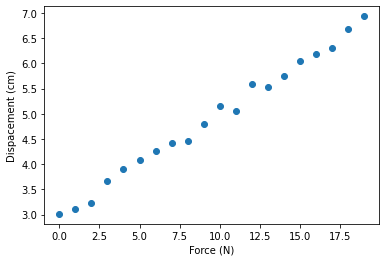

In [2]:
#Numerical example 1

#assume a that data was generated by the following model 
import numpy as np
import matplotlib.pyplot as plt
force = np.arange(0,20)
amount_of_noise = 0.1
displacement = 3 + force*(0.2) + amount_of_noise*np.random.randn(*force.shape)
plt.scatter(force,displacement)
plt.xlabel('Force (N)')
plt.ylabel('Dispacement (cm)')
plt.show()

if we only have access to the data $force$ and $displacement$, we can use least squares to estimate the parameters provided the model 

In [4]:
X = np.column_stack((np.ones_like(force.T), force.T))
w_est = (np.linalg.inv(X.T@X)@X.T)@displacement
print(w_est)

[2.98638151 0.20262085]


In [9]:
#we can also estimate the variance of the estimates
w_var = np.linalg.inv(X.T@X)*(np.var(displacement - X@w_est))
print(w_var)

[[ 1.87247927e-03 -1.44036867e-04]
 [-1.44036867e-04  1.51617755e-05]]


So that the estimated parameters mean and standar deviations are 


In [15]:
print(f'{w_est[0]} +/- {np.sqrt(w_var[0,0])}')
print(f'{w_est[1]} +/- {np.sqrt(w_var[1,1])}')

2.986381507491278 +/- 0.04327215352945083
0.20262084604513841 +/- 0.0038938124600836318


Clearly both parameters are needed in the model

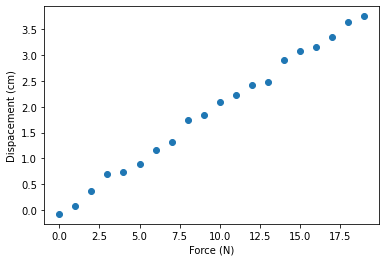

In [17]:
#Numerical example 2

#assume a that data was generated by the following model 
import numpy as np
import matplotlib.pyplot as plt
force = np.arange(0,20)
amount_of_noise = 0.1
displacement = force*(0.2) + amount_of_noise*np.random.randn(*force.shape)
plt.scatter(force,displacement)
plt.xlabel('Force (N)')
plt.ylabel('Dispacement (cm)')
plt.show()

In [18]:
# we will use the same model as before 
X = np.column_stack((np.ones_like(force.T), force.T))
w_est = (np.linalg.inv(X.T@X)@X.T)@displacement
w_var = np.linalg.inv(X.T@X)*(np.var(displacement - X@w_est))
print(f'{w_est[0]} +/- {np.sqrt(w_var[0,0])}')
print(f'{w_est[1]} +/- {np.sqrt(w_var[1,1])}')

-0.034782616184697246 +/- 0.03268465581777616
0.20311467080513307 +/- 0.002941104375361947


as you can see, for the first parameter, we have 

$$
-0.034 - 0.032 = -0.066< 0
$$

so that this parameter is likely not needed in the model. 

#### This approach is very sensible to noise level, and is not useful if the model does not approximates well the true data behavior. Other approaches that are more robust to noise are available and should be preferred, such as adjusted R2 score, or the information criterion. 

### Polynomial fitting

Often, the relation between data is non-linear and cannot be explained by a simple linear model. 

Consider the following data points

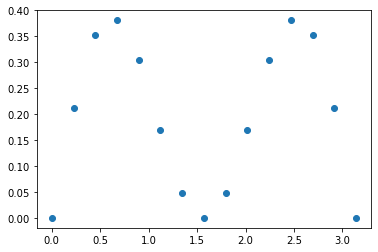

In [138]:
x = np.array([[0., 0.22439948, 0.44879895, 0.67319843, 0.8975979 ,
       1.12199738, 1.34639685, 1.57079633, 1.7951958 , 2.01959528,
       2.24399475, 2.46839423, 2.6927937 , 2.91719318, 3.14159265]])
y = np.array([[0.00000000e+00, 2.11502684e-01, 3.52202913e-01, 3.81114667e-01,
       3.03928805e-01, 1.69611983e-01, 4.82741074e-02, 3.74939946e-33,
       4.82741074e-02, 1.69611983e-01, 3.03928805e-01, 3.81114667e-01,
       3.52202913e-01, 2.11502684e-01, 1.22464680e-16]])
plt.plot(x.T,y.T,'o')

Assume for a moment that a linear model can explain the relation between variables, that is
$$
\hat{y} = w_{0} + w_{1}x +e
$$

where $w_{0}$ and $w_{1}$ are parameters that can be estimated with least-squares, and $e$ is the noise.

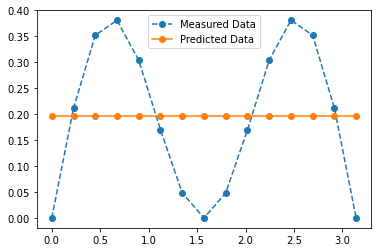

In [55]:
X = np.column_stack((np.ones_like(x.T), x.T))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
plt.plot(x.T,y.T ,'--o',label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

Clearly that is not a good model, so we can start increasing the dimensionality of our model by adding non-linear relations between input and output data, that is
$$
\hat{y} = w_{0} + w_{1}x + w_{2}x^{2} +e
$$

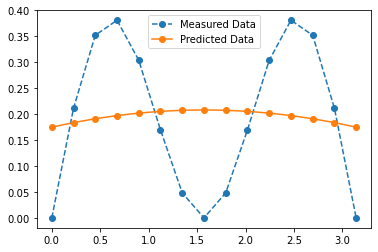

In [56]:
X = np.column_stack((np.ones_like(x.T), x.T, (x**2).T))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
plt.plot(x.T,y.T, '--o',label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

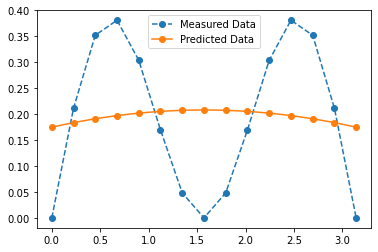

In [57]:
X = np.column_stack((np.ones_like(x.T), x.T, (x**2).T, (x**3).T))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
plt.plot(x.T,y.T, '--o', label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

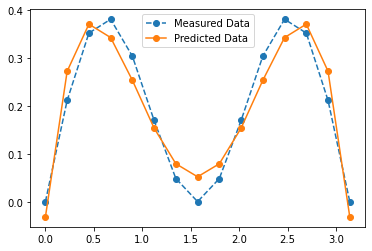

In [59]:
X = np.column_stack((np.ones_like(x.T), x.T, (x**2).T, (x**3).T, (x**4).T))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
plt.plot(x.T,y.T, '--o', label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

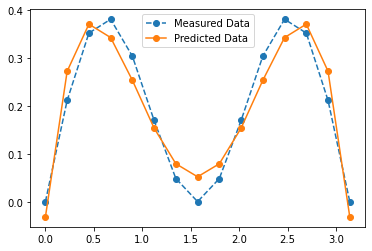

In [60]:
X = np.column_stack((np.ones_like(x.T), x.T, (x**2).T, (x**3).T, (x**4).T, (x**5).T))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
plt.plot(x.T,y.T, '--o',label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

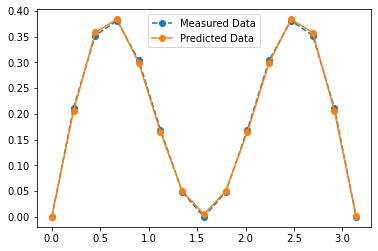

In [153]:
X = np.column_stack(( x.T, (x**2).T, (x**3).T, (x**4).T, (x**5).T,(x**6).T ))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
plt.plot(x.T,y.T, '--o', label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

We are basically creating a model that describes the data as
$$
\begin{bmatrix}
y[1] \\
y[2] \\
\vdots \\
y[n]
\end{bmatrix} = \begin{bmatrix}
1 & x[1] & x[1]^2 & x[1]^3 & x[1]^4 & x[1]^5 & x[1]^6 \\
1 & x[2] & x[2]^2 & x[2]^3 & x[2]^4 & x[2]^5 & x[2]^6 \\
\vdots & \vdots \\
1 & x[n] & x[n]^2 & x[n]^3 & x[n]^4 & x[n]^5 & x[n]^6
\end{bmatrix}
\begin{bmatrix}
w_{0}\\
w_{1} \\
w_{2} \\
w_{3} \\
w_{4} \\
w_{5} \\
w_{6} \\
\end{bmatrix}
$$

and used least-squares to estimate the unknown model parameters

Now, we can estiamte the parameters variances and verify in they are needed in the model 

w_0 = 0.001336477982363183 +/- 0.004135346775915955
w_1 = 0.7707192056221689 +/- 0.04382453590734302
w_2 = 1.4884015639508124 +/- 0.1384868749473225
w_3 = -4.552061101937705 +/- 0.17542794496869168
w_4 = 3.4685807246298315 +/- 0.10425079069174534
w_5 = -1.0481681103918992 +/- 0.029097048474591207
w_6 = 0.11121409046910713 +/- 0.0030769358798714555


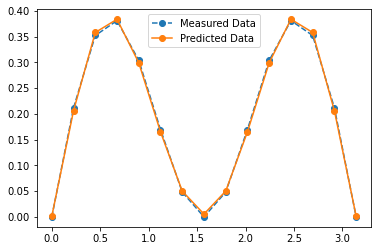

In [98]:
X = np.column_stack((np.ones_like(x.T), x.T, (x**2).T, (x**3).T, (x**4).T, (x**5).T, (x**6).T))
w_est = (np.linalg.inv(X.T@X)@X.T)@y.T
w_var = np.linalg.inv(X.T@X)*(np.var(y.T - X@w_est))
i=0
for w,var in zip(w_est,np.diag(w_var)): #I'm taking only the diagonal elements of the matrix w_var
    print(f'w_{i} = {w[0]} +/- {np.sqrt(var)}')
    i+=1
    
plt.plot(x.T,y.T, '--o', label='Measured Data')
plt.plot(x.T,X@w_est, '-o', label='Predicted Data')
plt.legend()

### Interpolation

Now that you have a model to describe the measured data, is possible to _fill the gaps_ in the data. 

Assume that you want to know the value of the signal at $x=2.1$, this value is not included in the original table, but it can be estimated with the model 
$$
y[2.1] = w_{0} + (2.1)w_{1} + (2.1)^2w_{2}+(2.1)^3w_{3} + (2.1)^4w_{4} + (2.1)^5w_{5} + (2.1)^6w_{6}
$$

Finally, if we want to have a smoother signal, we could create more values for the $x$ variable and use our model to find the corresponding values of $y$

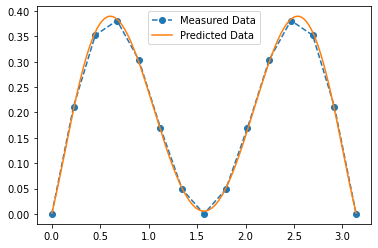

In [137]:
new_x = np.array([np.linspace(x[0][0],x[0][-1],1000)])
new_X = np.column_stack((np.ones_like(new_x.T), new_x.T, (new_x**2).T, (new_x**3).T, (new_x**4).T, (new_x**5).T, (new_x**6).T))

new_y = new_X@w_est
plt.plot(x.T,y.T, '--o', label='Measured Data')
plt.plot(new_x.T,new_y, label='Predicted Data')
plt.legend()

In [155]:
import statsmodels.api as sm
#For bladder
result = sm.OLS(y.T, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4930.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                    2.67e-15
Time:                        13:31:34   Log-Likelihood:                          60.762
No. Observations:                  15   AIC:                                     -109.5
Df Residuals:                       9   BIC:                                     -105.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/diegoguarinlopez/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
